<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/AA_5_03_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 3 & Submit

You will work with data from the Housing Prices Competition for Kaggle Learn Users.

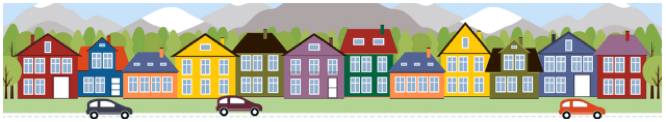


Step 1:
- Read the test and train datasets
- Separate the SalePrice as target variable
- Create a train and validation dataset from the train dataset that you created in the first step
- Check if you have any categorical features
- Check if you have any numerical features
​

Step 2:
- Create a pipeline of SimpleImputer and StandardScaler transformers for the numerical data
- Create a SimpleImputer and OneHotEncoder for the categorical data
- Bundle the pre-processing steps into a column transformer
- Create a RandomForestRegressor


#**STEP 1**

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the test and train datasets
#train_data = pd.read_csv('train.csv')
#test_data = pd.read_csv('test.csv')

from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Datasets/

train_data = pd.read_csv('train1.csv')
test_data = pd.read_csv('test1.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Datasets


In [9]:
# Separate the SalePrice as target variable
target = train_data['SalePrice']
train_data.drop('SalePrice', axis=1, inplace=True)

In [10]:
# Create a train and validation dataset from the train dataset
X_train, X_val, y_train, y_val = train_test_split(train_data, target, test_size=0.2, random_state=42)

In [11]:
# Check if you have any categorical features
cat_features = [feature for feature in X_train.columns if X_train[feature].dtype == 'object']
print('Categorical features:', cat_features)

Categorical features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [12]:
# Check if you have any numerical features
num_features = [feature for feature in X_train.columns if X_train[feature].dtype != 'object']
print('Numerical features:', num_features)

Numerical features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


#**STEP 2**

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [15]:
# Create a pipeline of SimpleImputer and StandardScaler transformers for the numerical data
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [16]:
# Create a SimpleImputer and OneHotEncoder for the categorical data
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())])

In [17]:
# Bundle the pre-processing steps into a column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)])

In [18]:
# Create a RandomForestRegressor
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())])

In [20]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'Lo...
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('regressor', RandomForestRegressor())])